Rasheed Alqobbaj - 1202474

# Assignment 1 - Food Data Analysis
The dataset provided contains the prices of various food commodities in Gaza for the year 2022.

## Table of Contents: (click to jump to the section)
1. [Importing libraries](#Importing-libraries)
2. [Importing the dataset](#Importing-the-dataset)
3. [Simple EDA](#Simple-EDA)
4. [Data Cleaning](#Data-Cleaning)
5. [Questions from assignment (The Tasks required)](#Questions-from-assignment)
    - [Q1- Identify the most expensive vegetables and fruits commodity during this period.](#Q1--Identify-the-most-expensive-vegetables-and-fruits-commodity-during-this-period.)
    - [Q2- Add a new column named currency_rate that captures the exchange rate between the local currency and the US dollar (USD).](#Q2--Add-a-new-column-named-currency_rate-that-captures-the-exchange-rate-between-the-local-currency-and-the-US-dollar-(USD).)
    - [Q3- Create a new column called unified_price that represents the price in USD per kilogram for commodities measured by weight and the price per liter for commodities measured by volume.](#Q3--Create-a-new-column-called-unified_price-that-represents-the-price-in-USD-per-kilogram-for-commodities-measured-by-weight-and-the-price-per-liter-for-commodities-measured-by-volume.)
    - [Q4- Using the unified_price, find the maximum price reached during this period and for which commodity for both:](#Q4--Using-the-unified_price,-find-the-maximum-price-reached-during-this-period-and-for-which-commodity-for-both:)
        - [commodities measured by weight](#commodities-measured-by-weight)
        - [commodities measured by volume](#commodities-measured-by-volume)

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
df = pd.read_csv('assignment_1-python.csv')
df.head()

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Bread,KG,actual,Retail,ILS,2.50,0.7934
1,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Potatoes (medium size),KG,actual,Retail,ILS,1.94,0.6157
2,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,"Rice (small grain, imported)",25 KG,actual,Retail,ILS,152.31,48.3351
3,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Wheat flour (locally processed),50 KG,actual,Retail,ILS,90.00,28.5612
4,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,"meat, fish and eggs",Eggs,2 KG,actual,Retail,ILS,11.72,3.7193


# Simple EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       354 non-null    object 
 1   region     354 non-null    object 
 2   city       354 non-null    object 
 3   market     354 non-null    object 
 4   latitude   354 non-null    float64
 5   longitude  354 non-null    float64
 6   category   354 non-null    object 
 7   commodity  354 non-null    object 
 8   unit       354 non-null    object 
 9   priceflag  354 non-null    object 
 10  pricetype  354 non-null    object 
 11  currency   354 non-null    object 
 12  price      354 non-null    float64
 13  usdprice   354 non-null    float64
dtypes: float64(4), object(10)
memory usage: 38.8+ KB


From the info above we can tell the following:
- There are 354 data entries
- There are 14 features with none having null values
- There are 4 numeric features and 10 object features
- The data types seem off/incorrect for some features like the date and unit features

In [4]:
df.describe()

,latitude,longitude,price,usdprice
count,3.540000e+02,354.00000,354.000000,354.000000
mean,3.134611e+01,34.32573,21.905706,6.548972
std,7.115485e-15,0.00000,35.615746,10.646186
min,3.134611e+01,34.32573,1.300000,0.375700
25%,3.134611e+01,34.32573,2.952500,0.872875
50%,3.134611e+01,34.32573,6.110000,1.834900
75%,3.134611e+01,34.32573,16.725000,5.158000
max,3.134611e+01,34.32573,155.000000,48.335100


While the geographical features are really not numeric it is still worth noting that the longitude's standard deviation is 0 which could be because of the Gaza Strips small size or a data entry error.

The price feature having a non-zero minimum value is a good sign that there are no missing values in the price feature. But based on the quartiles there seems to be some outliers in the price feature. 

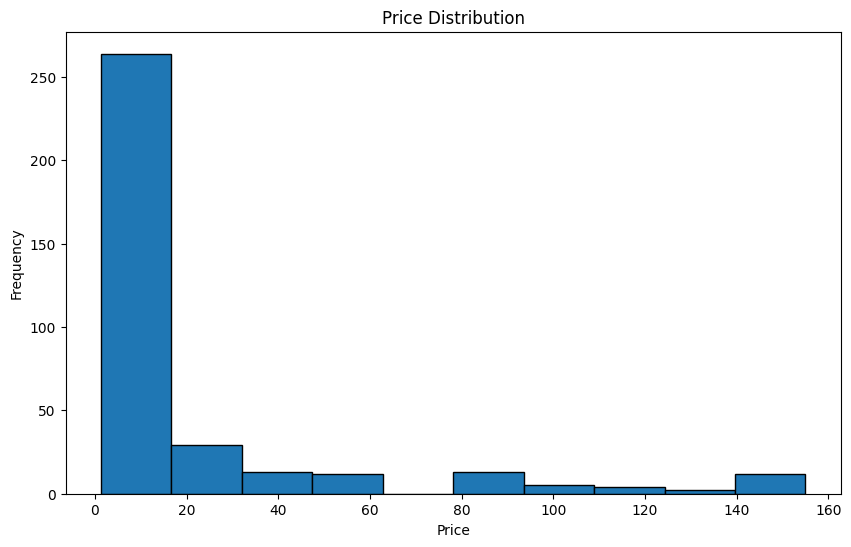

In [5]:
# Let's check the skewness of the price feature using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'], edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

From the graph we can tell that the price feature is heavily right-skewed and I suspect that it's because of the different categories of commodities. 

In [6]:
df["category"].value_counts()

category
vegetables and fruits    75
meat, fish and eggs      60
milk and dairy           60
cereals and tubers       48
miscellaneous food       36
pulses and nuts          27
oil and fats             24
non-food                 24
Name: count, dtype: int64

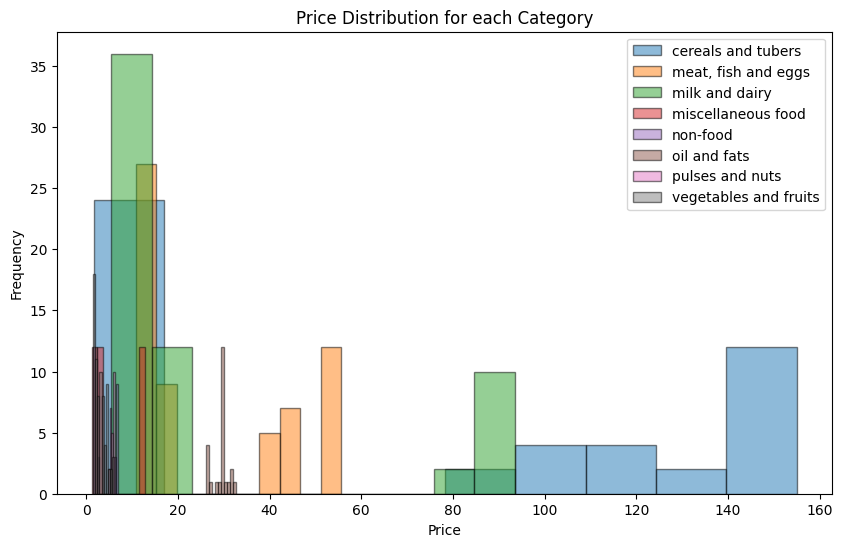

In [7]:
# Let's see the distribution of the price feature for each category by color coding them
categories = df['category'].unique()
plt.figure(figsize=(10, 6))
for category in categories:
    plt.hist(df[df['category'] == category]['price'], alpha=0.5, label=category, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution for each Category')
plt.legend()
plt.show()

My suspicion was incorrect since as observed on the above graph the cereals and tubers category has high frequency in the 0-20 bin but also has outliers affecting the distribution.

# Data Cleaning

## Fixing the Date data type

In [8]:
df['date'] = pd.to_datetime(df['date'])

## Uniforming the unit feature

In [9]:
df['unit'].value_counts()

unit
KG             243
500 G           24
25 KG           12
50 KG           12
2 KG            12
2.5 KG          12
L               12
Cubic meter     12
3 L             12
380 G            3
Name: count, dtype: int64

In [10]:
# Function to convert units and calculate price per unit
def convert_units(row):
    price = row['price']
    unit = row['unit']
    if 'KG' == unit:
        quantity = 1
    elif 'L' == unit:
        quantity = 1
    elif 'G' in unit:
        quantity = float(unit.split()[0]) / 1000 * 1000 # Convert grams to kilograms
        unit = 'KG'
    elif 'KG' in unit:
        quantity = float(unit.split()[0]) * 1000
        unit = 'KG'
    elif 'Cubic meter' in unit:
        quantity = 1000  # 1 cubic meter = 1000 liters
        unit = 'L'
    elif 'L' in unit:
        quantity = float(unit.split()[0]) * 1000
        unit = 'L'
    else:
        quantity = 1
    price_per_unit = price / quantity
    price_per_unit = round(price_per_unit, 2)
    return pd.Series([price_per_unit, unit])

In [11]:
# Apply the function to the dataframe
df[['price_per_unit', 'unit']] = df.apply(convert_units, axis=1)

df.head()

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,price_per_unit
0,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Bread,KG,actual,Retail,ILS,2.50,0.7934,2.50
1,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Potatoes (medium size),KG,actual,Retail,ILS,1.94,0.6157,1.94
2,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,"Rice (small grain, imported)",KG,actual,Retail,ILS,152.31,48.3351,6.09
3,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Wheat flour (locally processed),KG,actual,Retail,ILS,90.00,28.5612,1.80
4,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,"meat, fish and eggs",Eggs,KG,actual,Retail,ILS,11.72,3.7193,5.86


rechecking the unit feature and price distribution

In [12]:
df['unit'].value_counts()

unit
KG    318
L      36
Name: count, dtype: int64

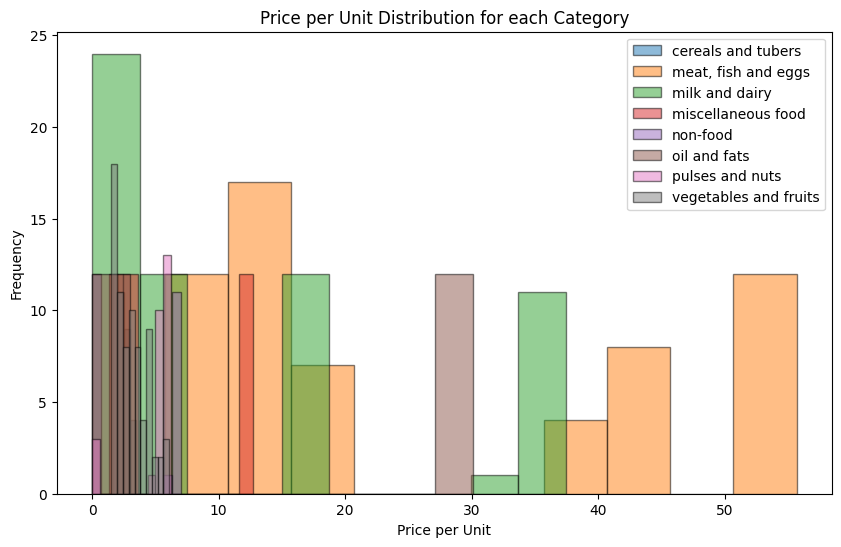

In [13]:
# Let's see the distribution of the price feature for each category by color coding them
categories = df['category'].unique()
plt.figure(figsize=(10, 6))
for category in categories:
    plt.hist(df[df['category'] == category]['price_per_unit'], alpha=0.5, label=category, edgecolor='black')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.title('Price per Unit Distribution for each Category')
plt.legend()
plt.show()

While still skewed the price per unit feature is more uniformed than the price feature.

# Questions from assignment

## Q1- Identify the most expensive vegetables and fruits commodity during this period.

In [14]:
df[df['category'] == 'vegetables and fruits'].sort_values('price', ascending=False).head(1)

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,price_per_unit
168,2022-06-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,vegetables and fruits,Apples (red),KG,actual,Retail,ILS,6.09,1.7703,6.09


In [15]:
df[df['category'] == 'vegetables and fruits'].sort_values('price_per_unit', ascending=False).head(1)

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,price_per_unit
168,2022-06-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,vegetables and fruits,Apples (red),KG,actual,Retail,ILS,6.09,1.7703,6.09


We can see that the most expensive vegetable and fruit commodity during this period is a KG of Red Apples with a price of 6.09 ILS and to put into perspective the price of 1 KG of Apples on the Shini Extra App is 11 ILS.

## Q2- Add a new column named currency_rate that captures the exchange rate between the local currency and the US dollar (USD).

In [16]:
# calculating the currency rate by dividing the price by the price in USD
df['currency_rate'] = df['price'] / df['usdprice']
df.head()

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,price_per_unit,currency_rate
0,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Bread,KG,actual,Retail,ILS,2.50,0.7934,2.50,3.150996
1,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Potatoes (medium size),KG,actual,Retail,ILS,1.94,0.6157,1.94,3.150885
2,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,"Rice (small grain, imported)",KG,actual,Retail,ILS,152.31,48.3351,6.09,3.151126
3,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Wheat flour (locally processed),KG,actual,Retail,ILS,90.00,28.5612,1.80,3.151128
4,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,"meat, fish and eggs",Eggs,KG,actual,Retail,ILS,11.72,3.7193,5.86,3.151131


Graphing the change in currency rate over time for fun

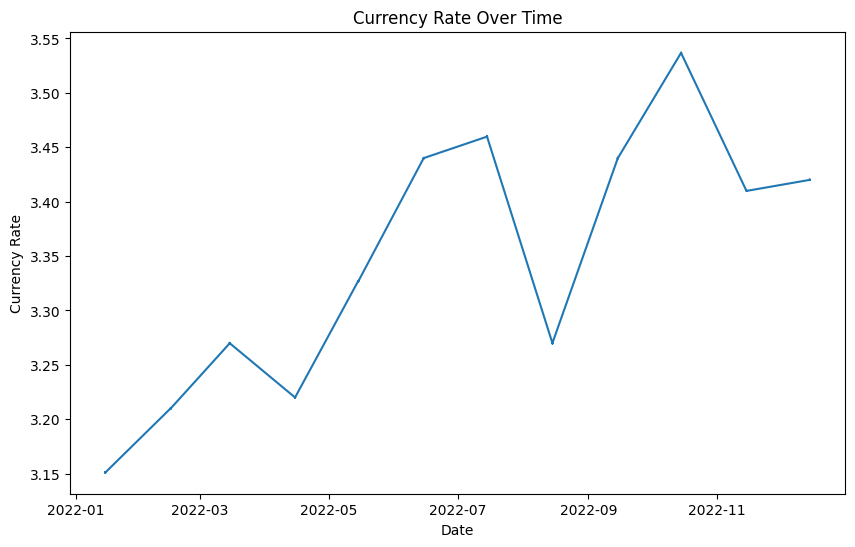

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['currency_rate'])
plt.xlabel('Date')
plt.ylabel('Currency Rate')
plt.title('Currency Rate Over Time')
plt.show()

We can observe that the currency rate was increasing over time while some dips are present.

## Q3- Create a new column called unified_price that represents the price in USD per kilogram for commodities measured by weight and the price per liter for commodities measured by volume.


In [18]:
df['unified_price'] = df['price_per_unit'] / df['currency_rate']
df.head()

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,price_per_unit,currency_rate,unified_price
0,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Bread,KG,actual,Retail,ILS,2.50,0.7934,2.50,3.150996,0.793400
1,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Potatoes (medium size),KG,actual,Retail,ILS,1.94,0.6157,1.94,3.150885,0.615700
2,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,"Rice (small grain, imported)",KG,actual,Retail,ILS,152.31,48.3351,6.09,3.151126,1.932642
3,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,cereals and tubers,Wheat flour (locally processed),KG,actual,Retail,ILS,90.00,28.5612,1.80,3.151128,0.571224
4,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,"meat, fish and eggs",Eggs,KG,actual,Retail,ILS,11.72,3.7193,5.86,3.151131,1.859650


Using the currency rate felt more natural since you had us calculate it in the previous question.

## Q4- Using the unified_price, find the maximum price reached during this period and for which commodity for both:

### commodities measured by weight


In [19]:
df[df['unit'] == 'KG'].sort_values('unified_price', ascending=False).head(1)

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,price_per_unit,currency_rate,unified_price
8,2022-01-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,"meat, fish and eggs","Meat (goat, with bones)",KG,actual,Retail,ILS,54.56,17.3144,54.56,3.151134,17.3144


The most expensive commodity measured by weight is a KG of Goat Meat with a price of 17.31 USD. and to put into perspective the price of 1 KG of Shopped Goat Meat on the Shini Extra App is 57 ILS which by current exchange rate is 15.16 USD.

### commodities measured by volume

In [20]:
df[df['unit'] == 'L'].sort_values('unified_price', ascending=False).head(1)

,date,region,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,price_per_unit,currency_rate,unified_price
220,2022-08-15,Gaza Strip,Kan Younis,Gaza Strip,31.34611,34.32573,non-food,Fuel (petrol-gasoline),L,actual,Retail,ILS,6.69,2.0459,6.69,3.269955,2.0459


The most expensive commodity measured by volume is a L of Fuel (petrol-gasoline) with a price of 2.05 USD. and no comparisons here since the Shini Extra App does not sell fuel.